DATA COLLECTION

In [27]:
import pandas as pd

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
file_path = '/content/drive/MyDrive/world_population.csv'

In [30]:
df=pd.read_csv(file_path)

In [31]:
print(df)

     Rank CCA3  Country/Territory           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022_Population  2020_Population  2015_Population  2010_Population  \
0           41128771         38972230         33753499         28189672   
1            2842321          2866849          2882481          29133

In [32]:
print(df.describe())

             Rank  2022_Population  2020_Population  2015_Population  \
count  234.000000     2.340000e+02     2.340000e+02     2.340000e+02   
mean   117.500000     3.407441e+07     3.350107e+07     3.172996e+07   
std     67.694165     1.367664e+08     1.355899e+08     1.304050e+08   
min      1.000000     5.100000e+02     5.200000e+02     5.640000e+02   
25%     59.250000     4.197385e+05     4.152845e+05     4.046760e+05   
50%    117.500000     5.559944e+06     5.493074e+06     5.307400e+06   
75%    175.750000     2.247650e+07     2.144798e+07     1.973085e+07   
max    234.000000     1.425887e+09     1.424930e+09     1.393715e+09   

       2010_Population  2000_Population  1990_Population  1980_Population  \
count     2.340000e+02     2.340000e+02     2.340000e+02     2.340000e+02   
mean      2.984524e+07     2.626947e+07     2.271022e+07     1.898462e+07   
std       1.242185e+08     1.116982e+08     9.783217e+07     8.178519e+07   
min       5.960000e+02     6.510000e+02    

In [33]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area(km²),Density(per km²),Growth_Rate,World_Population_Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


DATA PREPROCESSING

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [35]:
features=list(set(df.columns)-set(['World_Population_Percentage','CCA3','Country/Territory','Capital','Continent']))

In [36]:
print(features)

['1990_Population', '2022_Population', '2000_Population', '2010_Population', 'Growth_Rate', 'Area(km²)', 'Density(per km²)', '2015_Population', '1980_Population', '2020_Population', '1970_Population', 'Rank']


In [37]:
target=(['World_Population_Percentage'])

In [38]:
print(target)

['World_Population_Percentage']


In [39]:
y=df[target].values

In [40]:
X=df[features].values

In [41]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=0)

In [42]:
scaler=StandardScaler()

In [43]:
scaler.fit(train_X)

StandardScaler()

In [44]:
train_X=scaler.transform(train_X)

In [45]:
test_X=scaler.transform(test_X)

Exploratory Data Analysis

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

Rank
Skew : 0.0


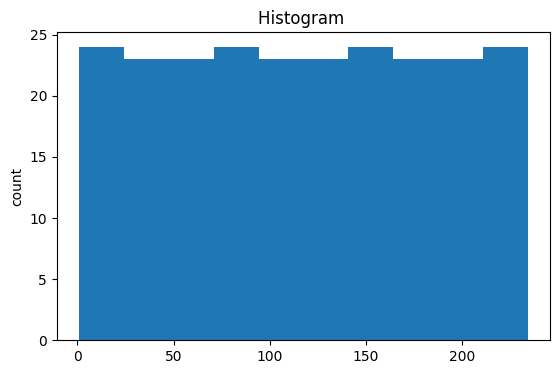

2022_Population
Skew : 9.2


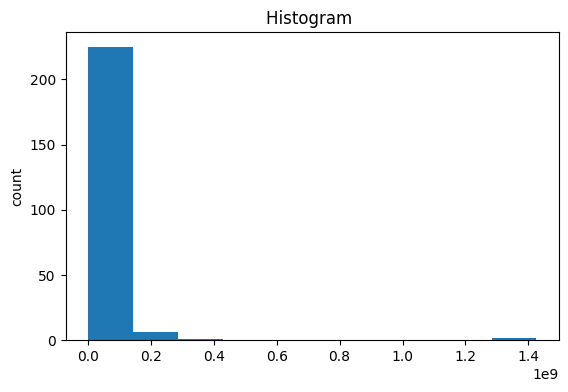

2020_Population
Skew : 9.2


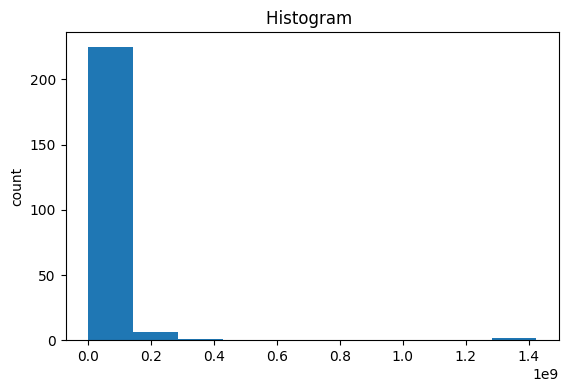

2015_Population
Skew : 9.2


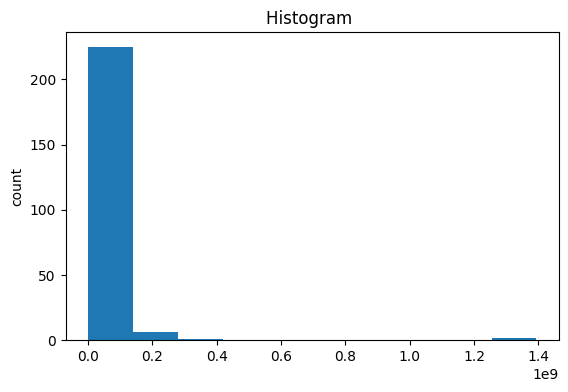

2010_Population
Skew : 9.3


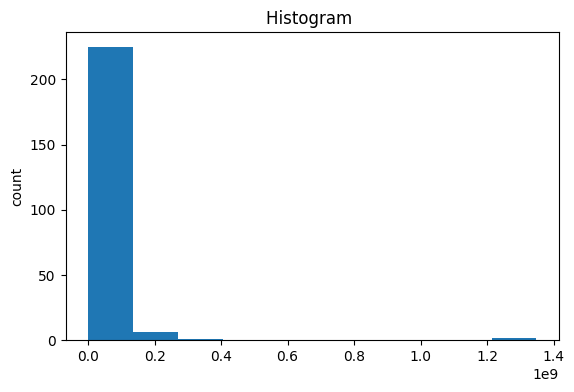

2000_Population
Skew : 9.4


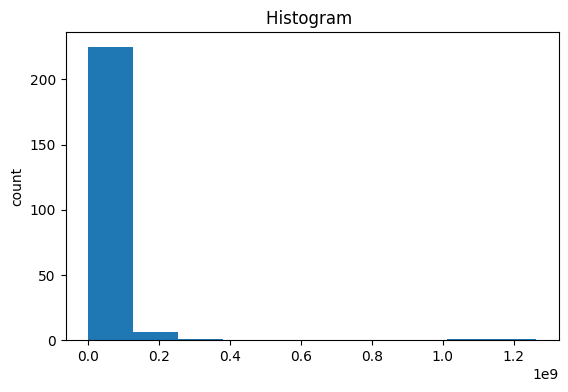

1990_Population
Skew : 9.6


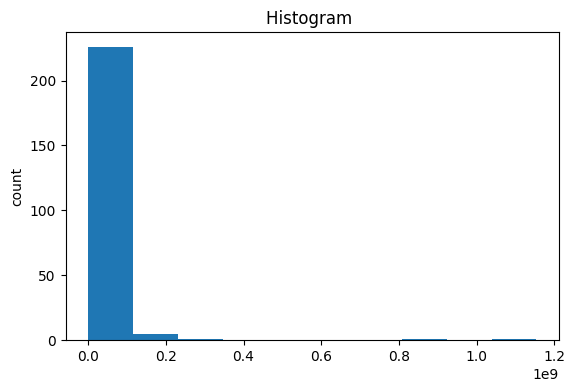

1980_Population
Skew : 9.7


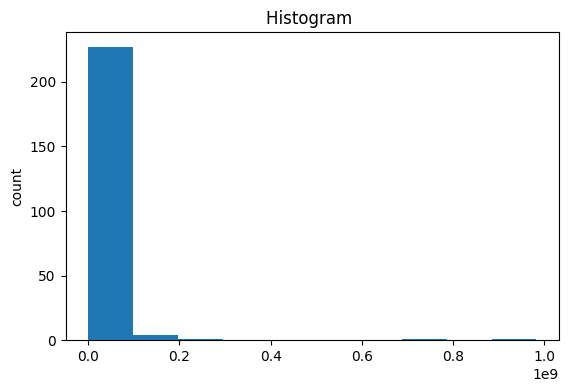

1970_Population
Skew : 9.6


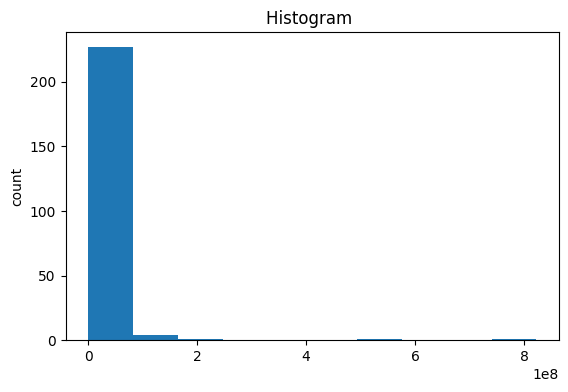

Area(km²)
Skew : 6.1


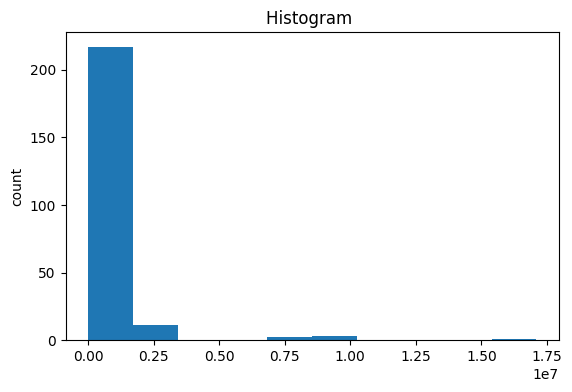

Density(per km²)
Skew : 8.9


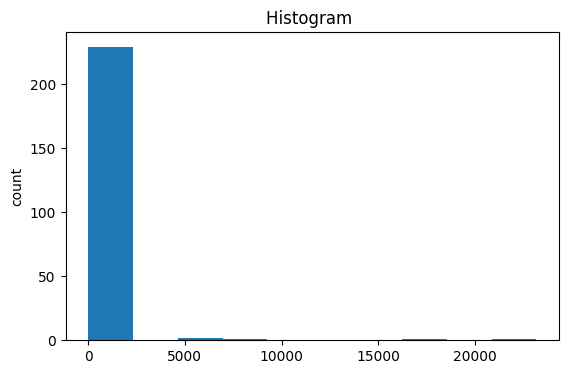

Growth_Rate
Skew : -1.1


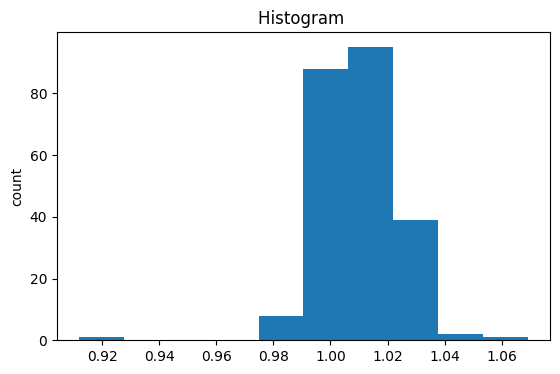

World_Population_Percentage
Skew : 9.2


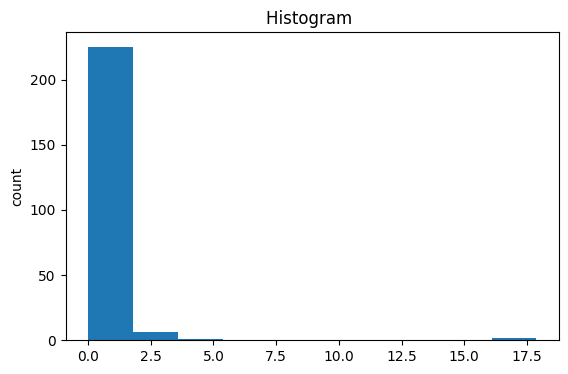

In [47]:
#histograms
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(),1))
    plt.figure(figsize = (14, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.title('Histogram ' )
    plt.show()

Rank


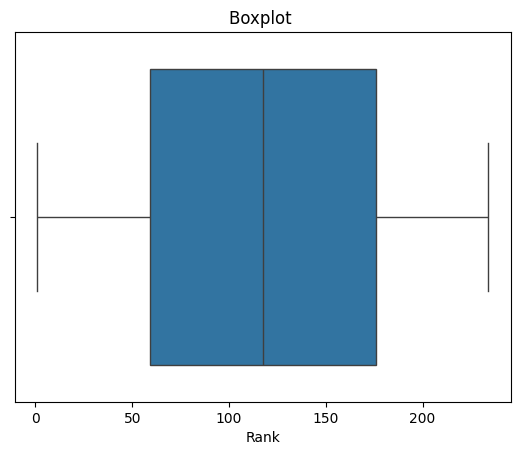

2022_Population


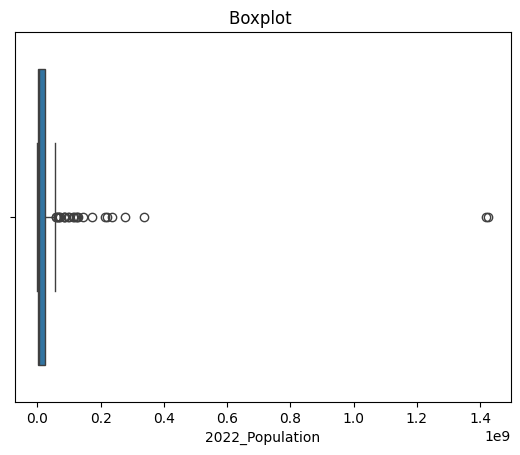

2020_Population


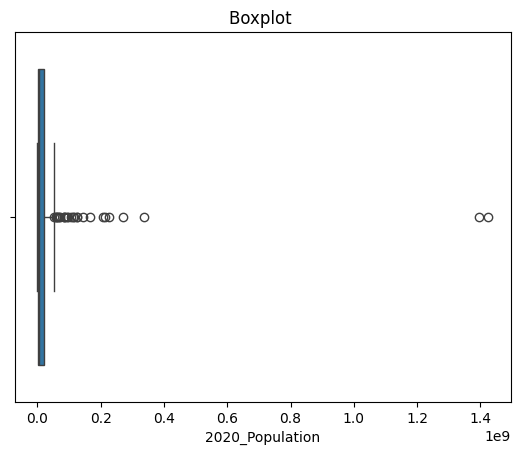

2015_Population


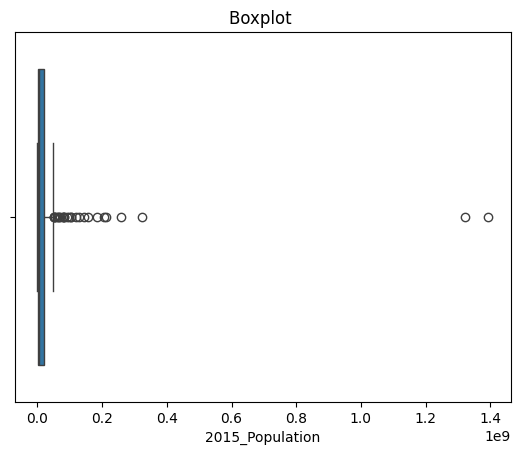

2010_Population


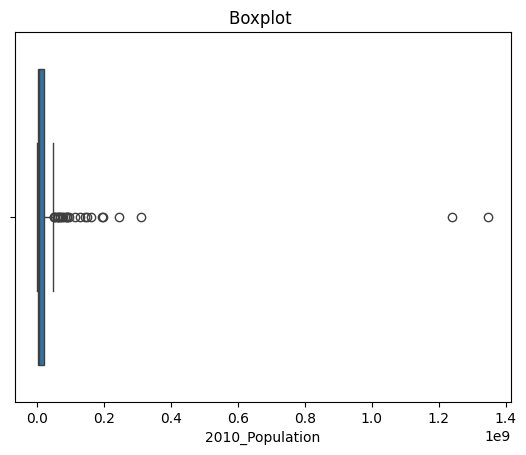

2000_Population


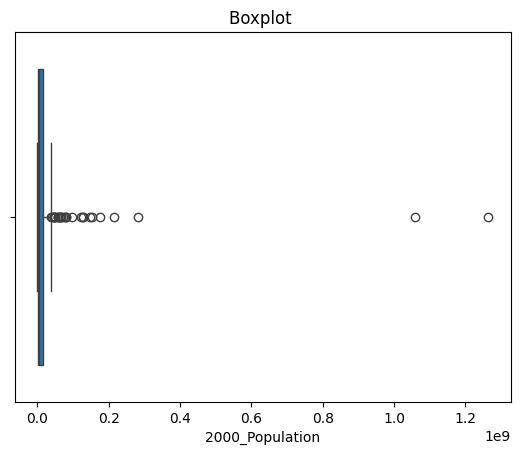

1990_Population


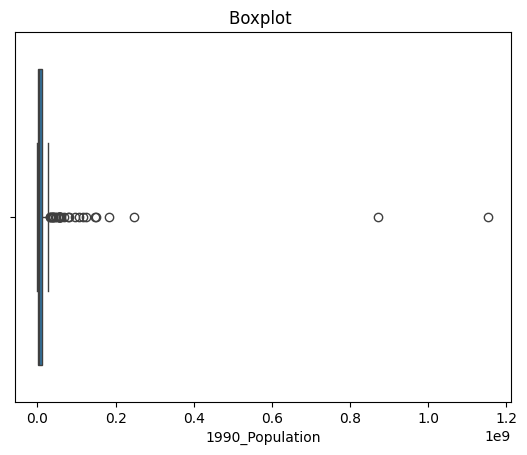

1980_Population


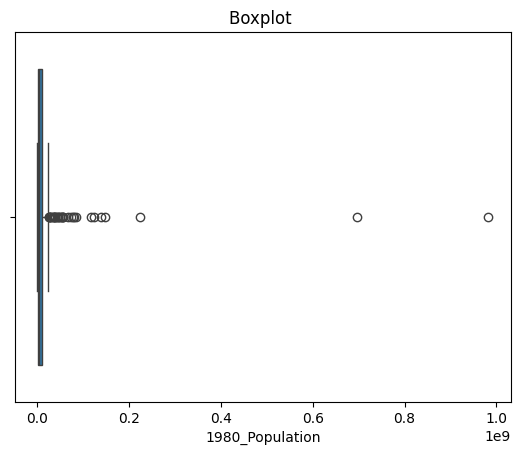

1970_Population


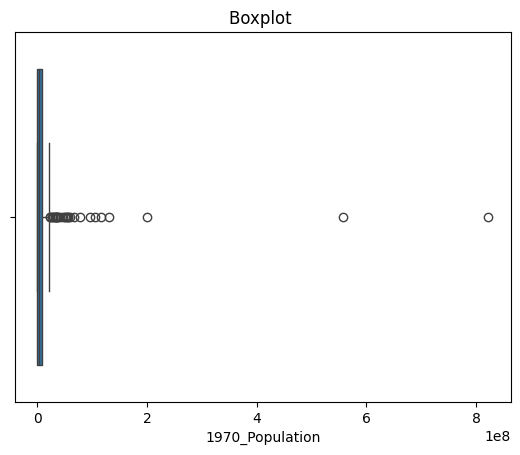

Area(km²)


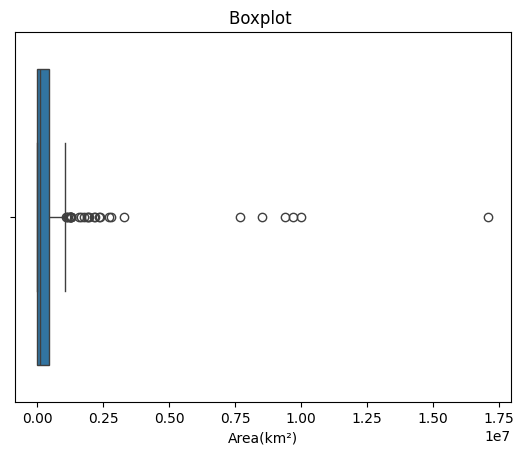

Density(per km²)


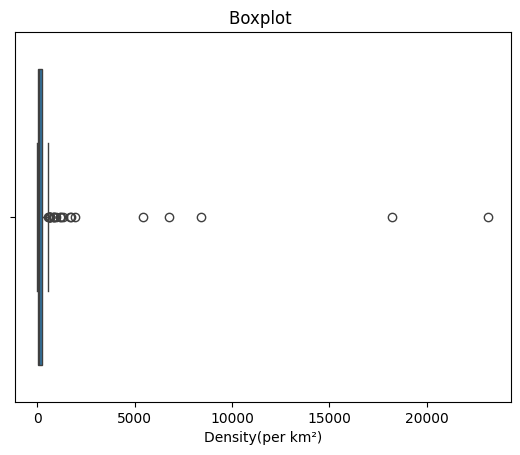

Growth_Rate


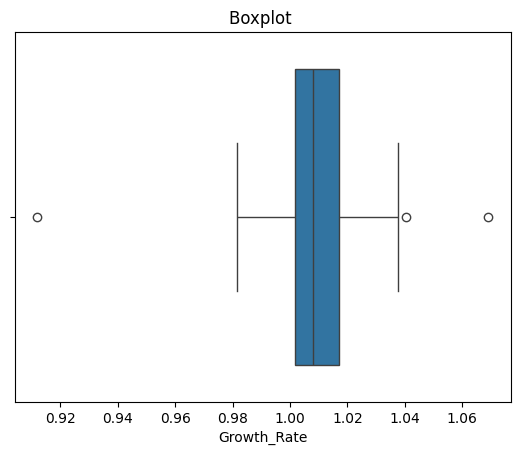

World_Population_Percentage


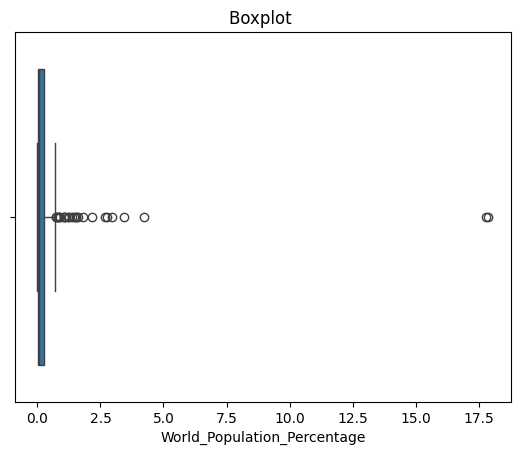

In [48]:
#boxplot
column=df.select_dtypes(include=np.number).columns.tolist()
for col in column:
    print(col)
    sns.boxplot(x=df[col])
    plt.title('Boxplot ' )
    plt.show()

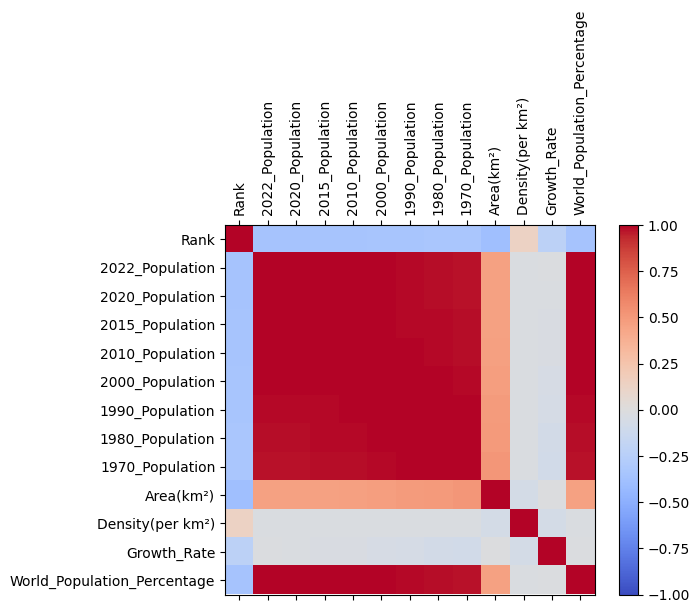

In [49]:
#correlation of MultiVariables
corr=df.select_dtypes(include=np.number).corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

LINEAR REGRESSION OF THE SAMPLE

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
Lin_model = LinearRegression()

In [52]:
Lin_model.fit(train_X, train_y.ravel())

LinearRegression()

In [53]:
predictions = Lin_model.predict(test_X)

In [54]:
mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

 Model Evaluation

In [55]:
mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

In [56]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.260580176442395e-05


In [57]:
print(f"R-squared: {r2}")

R-squared: 0.9999973299064812


In [59]:
accuracy=r2_score(test_y,predictions)
print("Accuracy of the project-", accuracy*100,"%")

Accuracy of the project- 99.99973299064811 %
